### Ejercicio N° 1

Los exoplanetas o planetas extrasolares son planetas que orbitan alrededor de otras estrellas que se encuentran más allá de nuestro sistema solar. El dataset exoplanets.csv , extraído del Archivo de Exoplanetas de la NASA, registra los descubrimientos de exoplanetas que han sido reportados a la fecha en publicaciones científicas revisadas por pares y confirmados utilizando varios métodos de detección y/o técnicas analíticas.

In [3]:
import pandas as pd

In [7]:
data_exoplan = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Unidad5\Datasets\exoplanets.csv', skiprows=36)

**El periodo orbital de un exoplaneta (pl_orbper) es el tiempo que tarda dicho planeta en dar una vuelta completa alrededor de la estrella que orbita (en días terrestres). ) Realice una descripción general de dicha variable que incluya tipo de variable, valores mínimo y máximo que toma y presencia de datos faltante**s.

In [17]:
data_exoplan['pl_orbper'].describe()

count    5.506000e+03
mean     7.769049e+04
std      5.420143e+06
min      9.070629e-02
25%      4.394872e+00
50%      1.133086e+01
75%      4.009320e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64

In [20]:
data_exoplan['pl_orbper'].isna().sum()

281

Tipo de variable cuantitativa continua, con tipo de dato float. Su valor mínimo es 9.070629e-02 y su valor máximo es 4.020000e+08. Por otro lado, posee 281 elementos nulos.

Histograma sobre el periodo orbital de los exoplanetas

In [23]:
import matplotlib.pyplot as plt

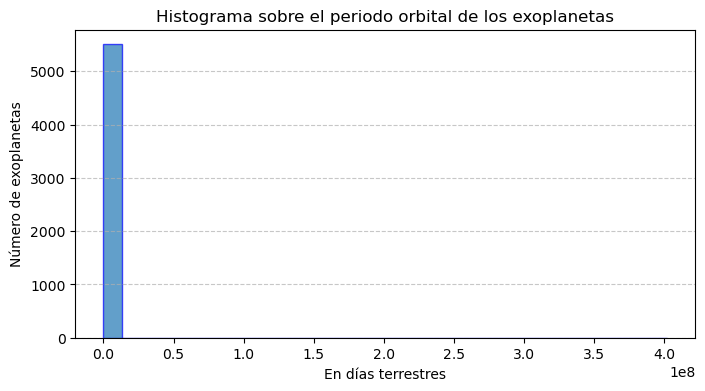

In [29]:
plt.figure(figsize=(8, 4))
data_exoplan['pl_orbper'].plot(kind='hist', bins=30, edgecolor='blue', alpha=0.7)
plt.title('Histograma sobre el periodo orbital de los exoplanetas')
plt.xlabel('En días terrestres')
plt.ylabel('Número de exoplanetas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**¿Considera que el gráfico anterior es representativo de la distribución real de la variable bajo estudio? ¿Qué podría hacer para mejorarlo?**

*No es representativo ya que es fuertemente asimétrico y todo se acumula en un solo bin. Por otro lado, el eje X utiliza una escala lineal que se extiende hasta 400 millones de días. Al haber tantos exoplanetas con periodos cortos, los que tienen periodos más largos quedan comprimidos.*

**Teniendo en cuenta su respuesta a la pregunta del ítem anterior, realice un histograma para representar la distribución de la variable introduciendo las modificaciones que considere adecuadas. ¿Qué puede decir acerca de la distribución del periodo orbital de los exoplanetas descubiertos?**

In [47]:
import numpy as np
import scipy.stats as stats

In [39]:
data_transf = data_exoplan.copy()
data_transf['orbper_log'] = np.log(data_transf['pl_orbper'])

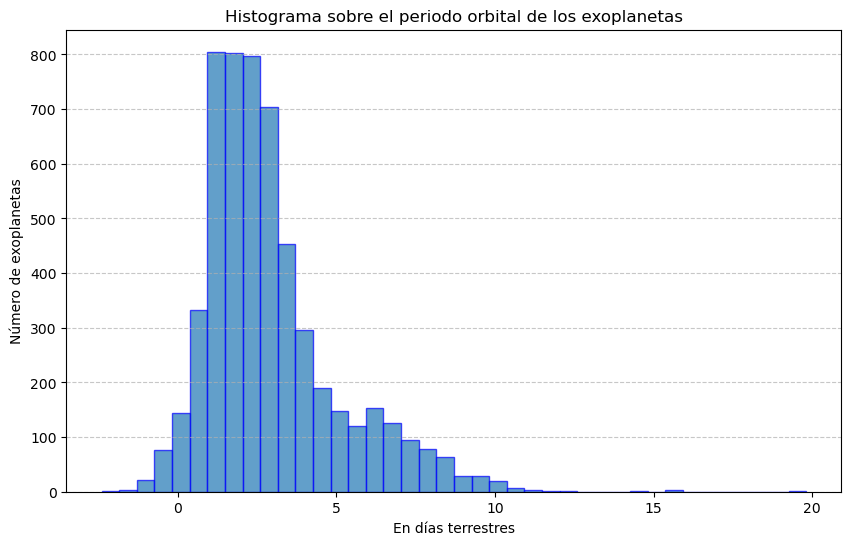

In [55]:
plt.figure(figsize=(10,6))
data_transf['orbper_log'].plot(kind='hist', bins=40, edgecolor='blue', alpha=0.7)
plt.title('Histograma sobre el periodo orbital de los exoplanetas')
plt.xlabel('En días terrestres')
plt.ylabel('Número de exoplanetas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Tras una transformación logarítmica, método elegido dado sus altos valores atípicos, queda un gráfico mucho más claro para leer. Ahora se obtiene una distribución con una moda marcada (apróx. entre 2 y 3) y cola a la derecha.*

**Represente el periodo orbital de nuestro planeta en el gráfico realizado en el ítem anterior y calcule el porcentaje de exoplanetas que poseen años más extensos que el año terrestre.**

In [109]:
# Perido orbital de la Tierra
per_orb_earth = 365.25
log_per_orb_earth = np.log(per_orb_earth)

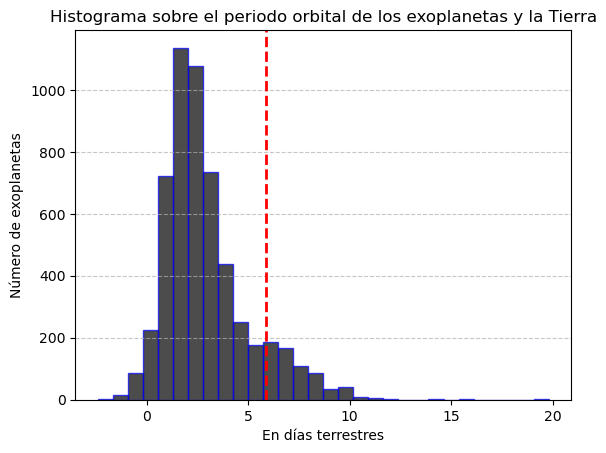

In [111]:
plt.hist(data_transf['orbper_log'], bins=30, edgecolor='blue', alpha=0.7, color='black')
plt.axvline(log_per_orb_earth, color='red', linestyle='--', linewidth=2, label='Periodo de la Tierra')
plt.title('Histograma sobre el periodo orbital de los exoplanetas y la Tierra')
plt.xlabel('En días terrestres')
plt.ylabel('Número de exoplanetas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [99]:
# Se seleccionan exoplanetas que tienen un periodo orbital mayor al de la Tierra
dif_exo_earth = data_transf[data_transf['orbper_log'] > log_per_orb_earth]

In [107]:
porc_exo_per_may_earth = (len(dif_exo_earth)/len(data_transf))* 100
round(porc_exo_per_may_earth, 2)

10.58

**Construya un gráfico que permita visualizar la distribución del número de planetas extrasolares encontrados según año y método de descubrimiento, en el que la variable temporal se encuentre categorizada en lustros (periodos de 5 años). Comente brevemente lo observado.**

In [116]:
exoplan_ano_metodo = data_exoplan[['disc_year','discoverymethod']]

In [128]:
import seaborn as sns

C:\Users\icrui\AppData\Local\Temp\ipykernel_13912\428961125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplan_ano_metodo['lustro'] = (exoplan_ano_metodo['disc_year'] // 5) * 5
C:\Users\icrui\AppData\Local\Temp\ipykernel_13912\428961125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exoplan_ano_metodo['lustro_str'] = exoplan_ano_metodo['lustro'].astype(str) + '-' + (exoplan_ano_metodo['lustro'] + 4).astype(str)


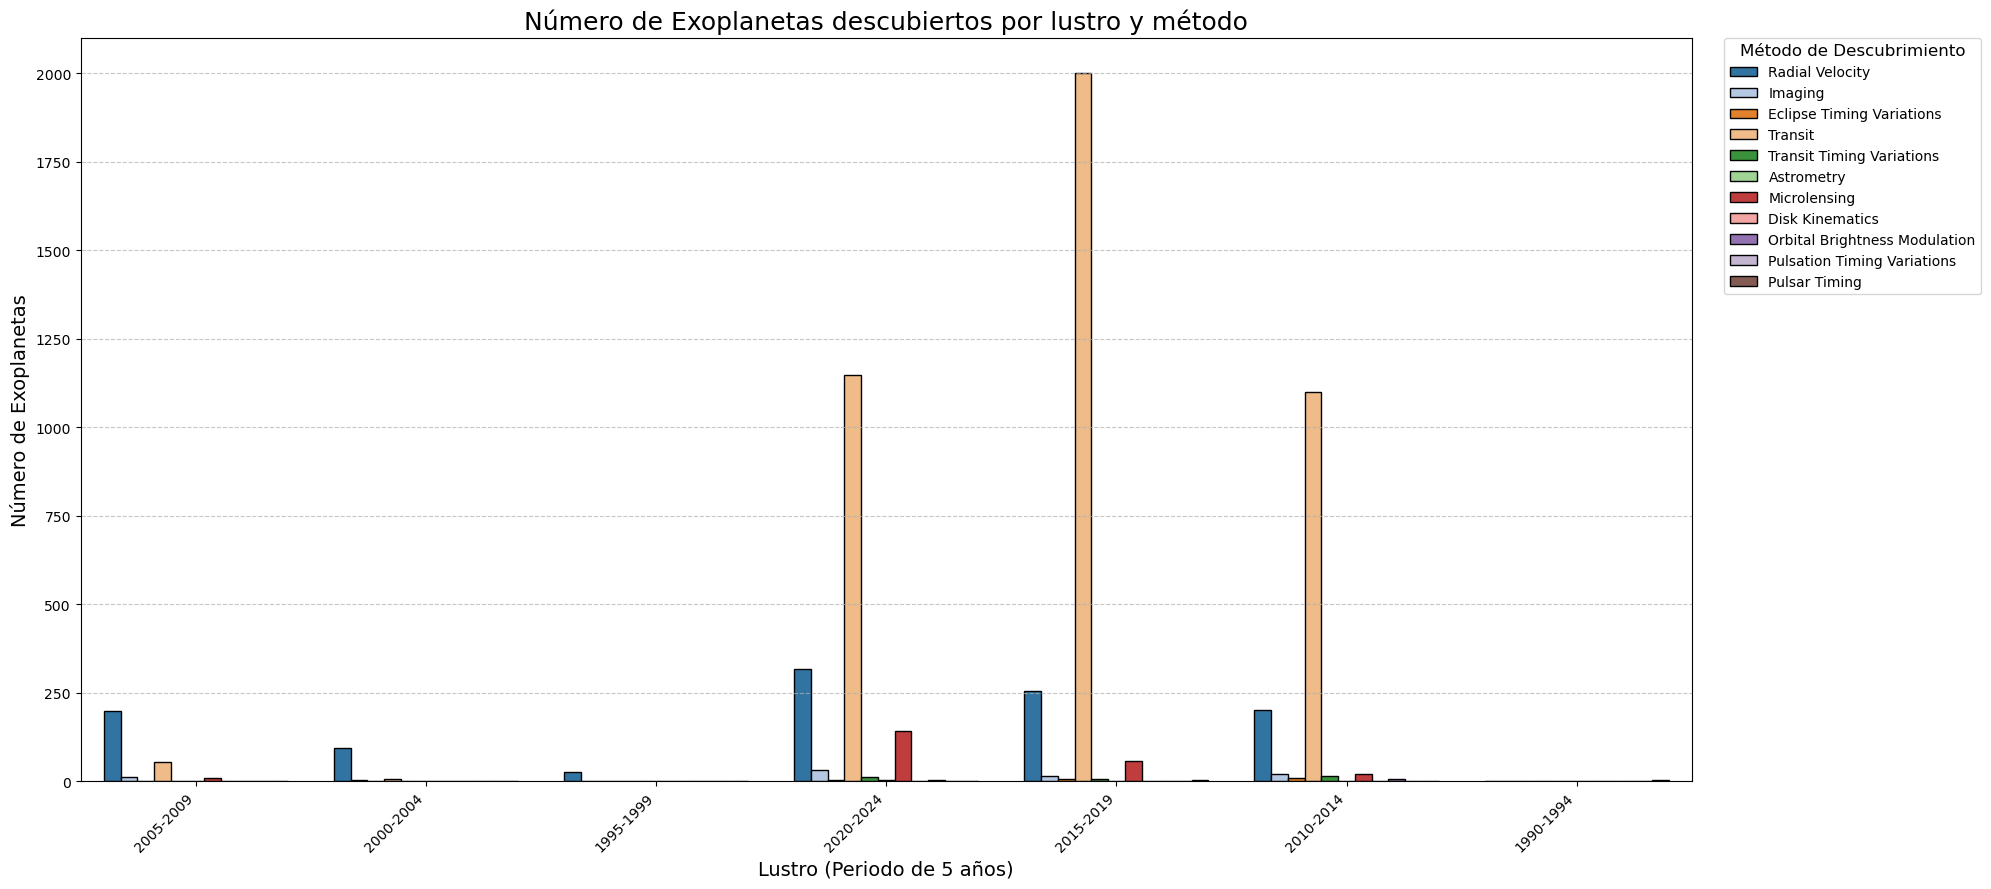

In [138]:
exoplan_ano_metodo['lustro'] = (exoplan_ano_metodo['disc_year'] // 5) * 5
exoplan_ano_metodo['lustro_str'] = exoplan_ano_metodo['lustro'].astype(str) + '-' + (exoplan_ano_metodo['lustro'] + 4).astype(str)

# Gráfico de Barras Agrupadas

plt.figure(figsize=(20, 9))
sns.countplot(
    data=exoplan_ano_metodo,
    x='lustro_str',
    hue='discoverymethod',
    palette='tab20',
    edgecolor='black'
)

plt.title('Número de Exoplanetas descubiertos por lustro y método', fontsize=18)
plt.xlabel('Lustro (Periodo de 5 años)', fontsize=14)
plt.ylabel('Número de Exoplanetas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Método de Descubrimiento', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()